## Исследование годовой сезонности

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/passengers.csv")
df1 = pd.read_csv("data/passengers2.csv")
df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


Построим график годовой сезонности.

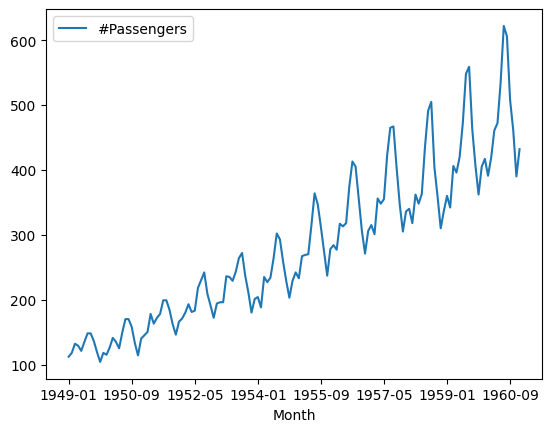

In [3]:
df["date"] = pd.to_datetime(df["Month"], format="%Y-%m-%d")

df.plot(x = "Month", y = "#Passengers")
plt.show()

На графике мы видим явную годовую сезонность с положительным трендом.

In [4]:
df['months'] = pd.DatetimeIndex( df['date']).month
df['months']

0       1
1       2
2       3
3       4
4       5
       ..
139     8
140     9
141    10
142    11
143    12
Name: months, Length: 144, dtype: int64

In [5]:
df[df['months']==1]

,Month,#Passengers,date,months
0,1949-01,112,1949-01-01,1
12,1950-01,115,1950-01-01,1
24,1951-01,145,1951-01-01,1
36,1952-01,171,1952-01-01,1
48,1953-01,196,1953-01-01,1
60,1954-01,204,1954-01-01,1
72,1955-01,242,1955-01-01,1
84,1956-01,284,1956-01-01,1
96,1957-01,315,1957-01-01,1
108,1958-01,340,1958-01-01,1


In [6]:
df[df['months']==7]

,Month,#Passengers,date,months
6,1949-07,148,1949-07-01,7
18,1950-07,170,1950-07-01,7
30,1951-07,199,1951-07-01,7
42,1952-07,230,1952-07-01,7
54,1953-07,264,1953-07-01,7
66,1954-07,302,1954-07-01,7
78,1955-07,364,1955-07-01,7
90,1956-07,413,1956-07-01,7
102,1957-07,465,1957-07-01,7
114,1958-07,491,1958-07-01,7


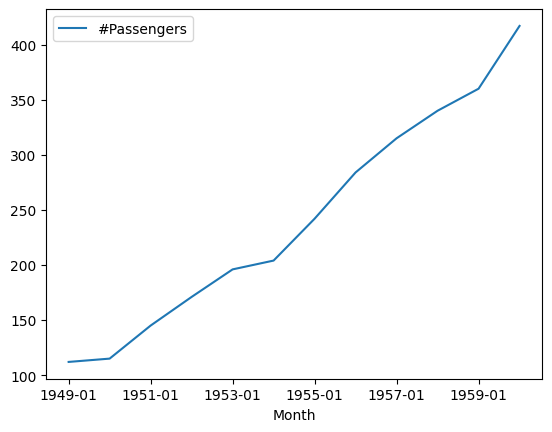

In [7]:

df[df['months']==1].plot(x = 'Month', y = "#Passengers")
plt.show()

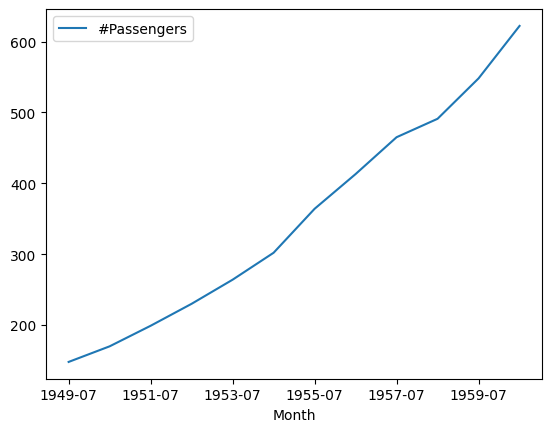

In [8]:

df[df['months']==7].plot(x = 'Month', y = "#Passengers")
plt.show()

Как мы видим, в Июле и в Январе число пассажиров имеет линейный ежегодный рост.

In [9]:
df['years'] = pd.DatetimeIndex( df['date']).year
df['years']

0      1949
1      1949
2      1949
3      1949
4      1949
       ... 
139    1960
140    1960
141    1960
142    1960
143    1960
Name: years, Length: 144, dtype: int64

In [10]:
df

,Month,#Passengers,date,months,years
0,1949-01,112,1949-01-01,1,1949
1,1949-02,118,1949-02-01,2,1949
2,1949-03,132,1949-03-01,3,1949
3,1949-04,129,1949-04-01,4,1949
4,1949-05,121,1949-05-01,5,1949
...,...,...,...,...,...
139,1960-08,606,1960-08-01,8,1960
140,1960-09,508,1960-09-01,9,1960
141,1960-10,461,1960-10-01,10,1960
142,1960-11,390,1960-11-01,11,1960


In [11]:
from statistics import variance
for i in df['years'].unique():
    print(f"Среднее за {i} год:",round(df[df['years']==i]['#Passengers'].mean(),3))
    print(f"Дисперсия за {i} год:",round(variance(df[df['years']==i]['#Passengers']),3))
    print("\n")

Среднее за 1949 год: 126.667
Дисперсия за 1949 год: 188.242


Среднее за 1950 год: 139.667
Дисперсия за 1950 год: 363.697


Среднее за 1951 год: 170.167
Дисперсия за 1951 год: 339.97


Среднее за 1952 год: 197.0
Дисперсия за 1952 год: 527.455


Среднее за 1953 год: 225.0
Дисперсия за 1953 год: 810.364


Среднее за 1954 год: 238.917
Дисперсия за 1954 год: 1219.72


Среднее за 1955 год: 284.0
Дисперсия за 1955 год: 1775.818


Среднее за 1956 год: 328.25
Дисперсия за 1956 год: 2290.75


Среднее за 1957 год: 368.417
Дисперсия за 1957 год: 3351.356


Среднее за 1958 год: 381.0
Дисперсия за 1958 год: 4164.182


Среднее за 1959 год: 428.333
Дисперсия за 1959 год: 4876.242


Среднее за 1960 год: 476.167
Дисперсия за 1960 год: 6043.061




Построим графику абсолютной разницы между соседними месяцами.

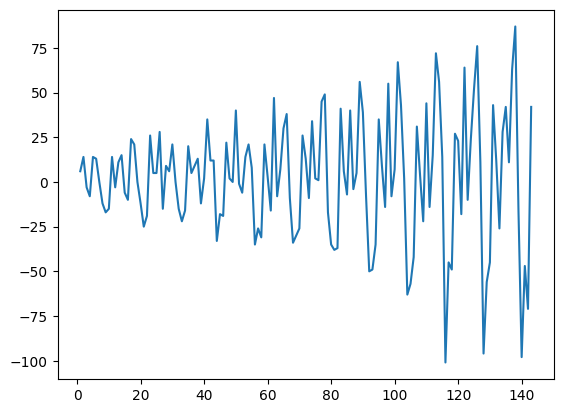

In [12]:
razn=[]
for i in range(1,len(df)):
    razn.append(df['#Passengers'][i]-df['#Passengers'][i-1])
plt.plot(range(1,144),razn)
plt.show()

По графику видно, что чем сильнее рост, тем сильнее падение. Наблюдается повышение дисперсии с ростом времени.

Построим графику абсолютной процентной между соседними месяцами.

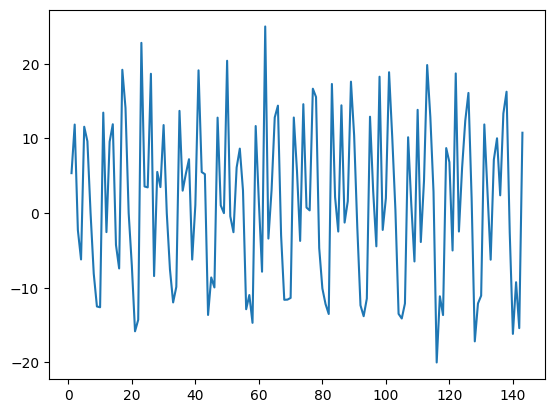

In [13]:
razn_precent=[]
for i in range(1,len(df)):
    razn_precent.append((df['#Passengers'][i]/df['#Passengers'][i-1]-1)*100)
plt.plot(range(1,144),razn_precent)
plt.show()

Как мы видим, в процентном соотношении рост не такой заметный как в абсолютном. Границы изменения составляют от падения на 20 процентов до роста на 20 процентов

In [14]:
df_copy = df.copy()
df_copy = df_copy.drop(columns=['Month','years','months'])


In [15]:
df_copy['date']=pd.to_datetime(df_copy['date'])
df_copy = df_copy.set_index('date')

In [16]:
df_copy

,#Passengers
date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


# Понижение частоты дискретизации

До года

In [17]:
df_copy['#Passengers'].resample('Y').sum()

date
1949-12-31    1520
1950-12-31    1676
1951-12-31    2042
1952-12-31    2364
1953-12-31    2700
1954-12-31    2867
1955-12-31    3408
1956-12-31    3939
1957-12-31    4421
1958-12-31    4572
1959-12-31    5140
1960-12-31    5714
Freq: A-DEC, Name: #Passengers, dtype: int64

До квартала

In [18]:
df_copy['#Passengers'].resample('Q').sum()

date
1949-03-31     362
1949-06-30     385
1949-09-30     432
1949-12-31     341
1950-03-31     382
1950-06-30     409
1950-09-30     498
1950-12-31     387
1951-03-31     473
1951-06-30     513
1951-09-30     582
1951-12-31     474
1952-03-31     544
1952-06-30     582
1952-09-30     681
1952-12-31     557
1953-03-31     628
1953-06-30     707
1953-09-30     773
1953-12-31     592
1954-03-31     627
1954-06-30     725
1954-09-30     854
1954-12-31     661
1955-03-31     742
1955-06-30     854
1955-09-30    1023
1955-12-31     789
1956-03-31     878
1956-06-30    1005
1956-09-30    1173
1956-12-31     883
1957-03-31     972
1957-06-30    1125
1957-09-30    1336
1957-12-31     988
1958-03-31    1020
1958-06-30    1146
1958-09-30    1400
1958-12-31    1006
1959-03-31    1108
1959-06-30    1288
1959-09-30    1570
1959-12-31    1174
1960-03-31    1227
1960-06-30    1468
1960-09-30    1736
1960-12-31    1283
Freq: Q-DEC, Name: #Passengers, dtype: int64

# Повышение частоты дискретизации

Заполнение последующим значением предыдущих.(до дня)

In [19]:
df_copy['#Passengers'].resample('D').bfill()

date
1949-01-01    112
1949-01-02    118
1949-01-03    118
1949-01-04    118
1949-01-05    118
             ... 
1960-11-27    432
1960-11-28    432
1960-11-29    432
1960-11-30    432
1960-12-01    432
Freq: D, Name: #Passengers, Length: 4353, dtype: int64

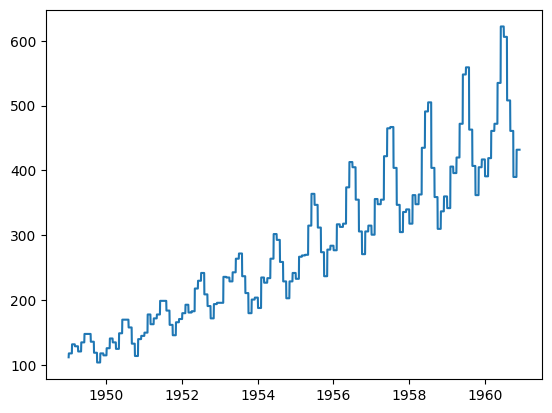

In [20]:
p = plt.plot(df_copy['#Passengers'].resample('D').bfill().index, df_copy['#Passengers'].resample('D').bfill().values)

Заполнение прыдыдущих значений следующим.(до дня)

In [21]:
df_copy['#Passengers'].resample('D').ffill()

date
1949-01-01    112
1949-01-02    112
1949-01-03    112
1949-01-04    112
1949-01-05    112
             ... 
1960-11-27    390
1960-11-28    390
1960-11-29    390
1960-11-30    390
1960-12-01    432
Freq: D, Name: #Passengers, Length: 4353, dtype: int64

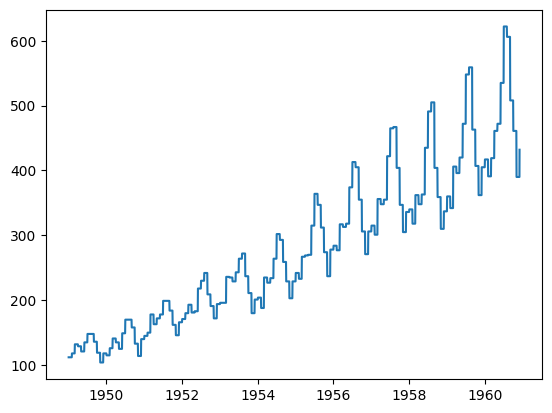

In [22]:
p = plt.plot(df_copy['#Passengers'].resample('D').ffill().index, df_copy['#Passengers'].resample('D').ffill().values)

Заполнение последующим значением предыдущих.(до недели)

In [23]:
df_copy['#Passengers'].resample('W').bfill()

date
1949-01-02    118.0
1949-01-09    118.0
1949-01-16    118.0
1949-01-23    118.0
1949-01-30    118.0
              ...  
1960-11-06    432.0
1960-11-13    432.0
1960-11-20    432.0
1960-11-27    432.0
1960-12-04      NaN
Freq: W-SUN, Name: #Passengers, Length: 623, dtype: float64

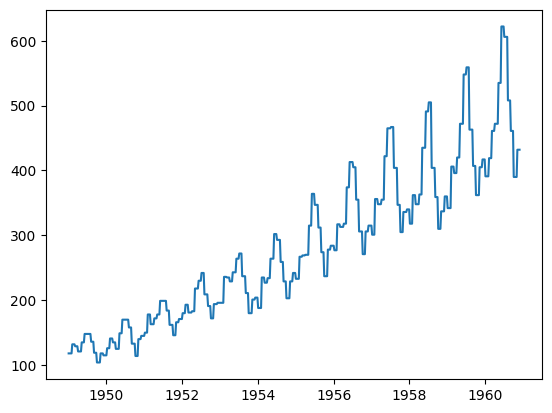

In [24]:
p = plt.plot(df_copy['#Passengers'].resample('W').bfill().index, df_copy['#Passengers'].resample('W').bfill().values)

Заполнение прыдыдущих значений следующим.(до недели)

In [25]:
df_copy['#Passengers'].resample('W').ffill()

date
1949-01-02    112
1949-01-09    112
1949-01-16    112
1949-01-23    112
1949-01-30    112
             ... 
1960-11-06    390
1960-11-13    390
1960-11-20    390
1960-11-27    390
1960-12-04    432
Freq: W-SUN, Name: #Passengers, Length: 623, dtype: int64

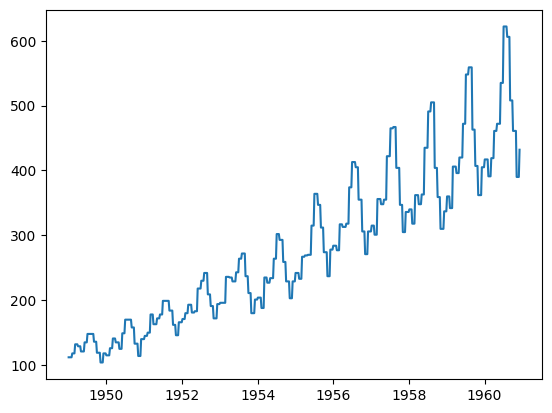

In [26]:
p = plt.plot(df_copy['#Passengers'].resample('W').ffill().index, df_copy['#Passengers'].resample('W').ffill().values)

In [27]:
df_copy1 = pd.DataFrame(df_copy['#Passengers'].resample('D').mean())
df_copy1['date'] = df_copy1.index
df_copy1 = df_copy1.reset_index(drop=True)

In [28]:
df_copy1

,#Passengers,date
0,112.0,1949-01-01
1,NaN,1949-01-02
2,NaN,1949-01-03
3,NaN,1949-01-04
4,NaN,1949-01-05
...,...,...
4348,NaN,1960-11-27
4349,NaN,1960-11-28
4350,NaN,1960-11-29
4351,NaN,1960-11-30


Замена пропущенных значений среднегодовым

In [29]:
df_copy1["task"] = df_copy1.groupby(df_copy1["date"].dt.year)["#Passengers"].transform(lambda x: x.fillna(x.mean()))

In [30]:
df_copy1

,#Passengers,date,task
0,112.0,1949-01-01,112.000000
1,NaN,1949-01-02,126.666667
2,NaN,1949-01-03,126.666667
3,NaN,1949-01-04,126.666667
4,NaN,1949-01-05,126.666667
...,...,...,...
4348,NaN,1960-11-27,476.166667
4349,NaN,1960-11-28,476.166667
4350,NaN,1960-11-29,476.166667
4351,NaN,1960-11-30,476.166667


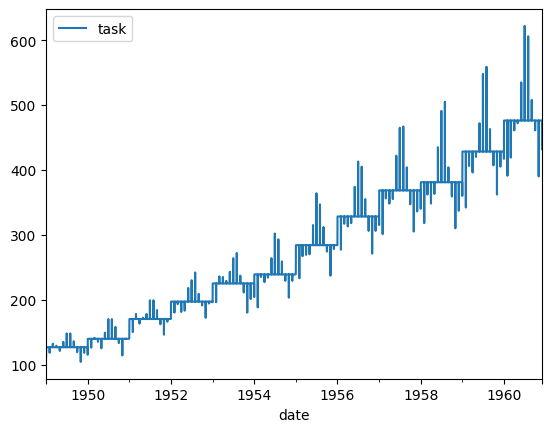

In [31]:
df_copy1.plot(x = "date", y = "task")
plt.show()

Замена пропущенных значений среднемесячным

In [32]:
df_copy1["avg_month"] = df_copy1.groupby(df_copy1["date"].dt.month)["#Passengers"].transform(lambda x: x.fillna(x.mean()))

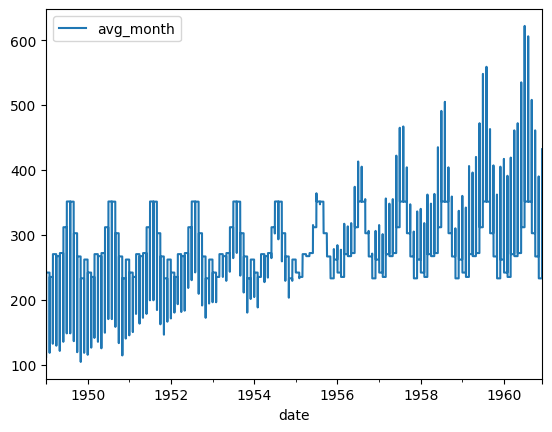

In [33]:
df_copy1.plot(x = "date", y = "avg_month")
plt.show()

In [34]:
df_copy1["sum_month"] = df_copy1.groupby(df_copy1["date"].dt.month)["#Passengers"].transform(lambda x: x.fillna(x.sum()))

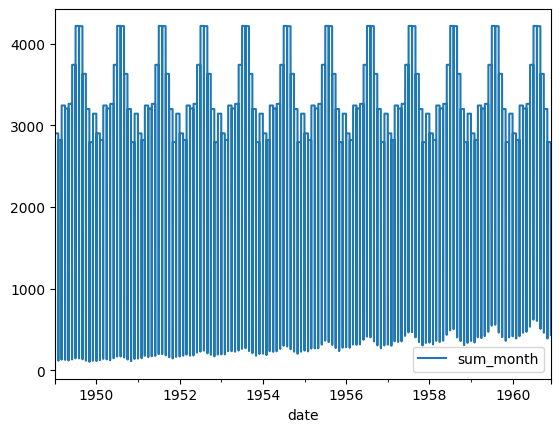

In [35]:
df_copy1.plot(x = "date", y = "sum_month")
plt.show()

In [36]:
#df_copy1["sk_avg_year"] = df['#Passengers'].rolling (5).mean()
                                                                                             
                                                                                             

In [37]:
#df['#Passengers'].rolling (5).mean()

Лучшим образом себя показала замена среднегодовыми значениями.

### Задание 2

In [38]:
df1

,Month,reference,target,missing
0,1949-01-01,112,112.0,NaN
1,1949-02-01,118,118.0,NaN
2,1949-03-01,132,132.0,NaN
3,1949-04-01,129,NaN,129.0
4,1949-05-01,121,121.0,NaN
...,...,...,...,...
139,1960-08-01,606,606.0,NaN
140,1960-09-01,508,508.0,NaN
141,1960-10-01,461,461.0,NaN
142,1960-11-01,390,390.0,NaN


In [39]:
df2 = df1.copy()

In [40]:
df2 = df2.drop(columns=['reference','missing'])

In [41]:
df2

,Month,target
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,NaN
4,1949-05-01,121.0
...,...,...
139,1960-08-01,606.0
140,1960-09-01,508.0
141,1960-10-01,461.0
142,1960-11-01,390.0


Интерполяция

In [42]:
df2 = df2.interpolate(method="linear")

In [43]:
df1

,Month,reference,target,missing
0,1949-01-01,112,112.0,NaN
1,1949-02-01,118,118.0,NaN
2,1949-03-01,132,132.0,NaN
3,1949-04-01,129,NaN,129.0
4,1949-05-01,121,121.0,NaN
...,...,...,...,...
139,1960-08-01,606,606.0,NaN
140,1960-09-01,508,508.0,NaN
141,1960-10-01,461,461.0,NaN
142,1960-11-01,390,390.0,NaN


In [44]:
df2

,Month,target
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,126.5
4,1949-05-01,121.0
...,...,...
139,1960-08-01,606.0
140,1960-09-01,508.0
141,1960-10-01,461.0
142,1960-11-01,390.0


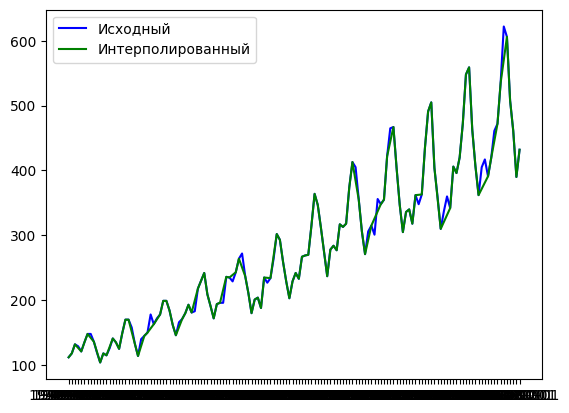

In [45]:
plt.plot(df1.Month, df1.reference, 'b-',
         df2.Month, df2.target, 'g-')
plt.legend(['Исходный','Интерполированный'])

### Задания 1-5 для интерполированного датасета

Построим график годовой сезонности.

In [46]:
df2=df2.rename(columns={'target':'#Passengers'})

In [47]:
df = df2.copy()

In [48]:
df

,Month,#Passengers
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,126.5
4,1949-05-01,121.0
...,...,...
139,1960-08-01,606.0
140,1960-09-01,508.0
141,1960-10-01,461.0
142,1960-11-01,390.0


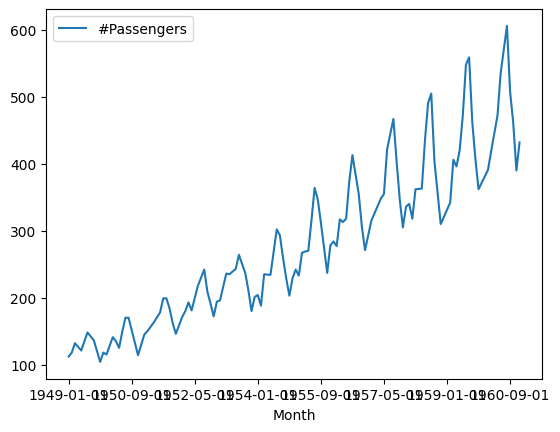

In [49]:
df["date"] = pd.to_datetime(df["Month"], format="%Y-%m-%d")

df.plot(x = "Month", y = "#Passengers")
plt.show()

На графике мы видим явную годовую сезонность с положительным трендом.

In [50]:
df['months'] = pd.DatetimeIndex( df['date']).month
df['months']

0       1
1       2
2       3
3       4
4       5
       ..
139     8
140     9
141    10
142    11
143    12
Name: months, Length: 144, dtype: int64

In [51]:
df[df['months']==1]

,Month,#Passengers,date,months
0,1949-01-01,112.000000,1949-01-01,1
12,1950-01-01,115.000000,1950-01-01,1
24,1951-01-01,145.000000,1951-01-01,1
36,1952-01-01,171.000000,1952-01-01,1
48,1953-01-01,196.000000,1953-01-01,1
60,1954-01-01,204.000000,1954-01-01,1
72,1955-01-01,242.000000,1955-01-01,1
84,1956-01-01,284.000000,1956-01-01,1
96,1957-01-01,315.000000,1957-01-01,1
108,1958-01-01,340.000000,1958-01-01,1


In [52]:
df[df['months']==7]

,Month,#Passengers,date,months
6,1949-07-01,148.0,1949-07-01,7
18,1950-07-01,170.0,1950-07-01,7
30,1951-07-01,199.0,1951-07-01,7
42,1952-07-01,230.0,1952-07-01,7
54,1953-07-01,264.0,1953-07-01,7
66,1954-07-01,302.0,1954-07-01,7
78,1955-07-01,364.0,1955-07-01,7
90,1956-07-01,413.0,1956-07-01,7
102,1957-07-01,444.5,1957-07-01,7
114,1958-07-01,491.0,1958-07-01,7


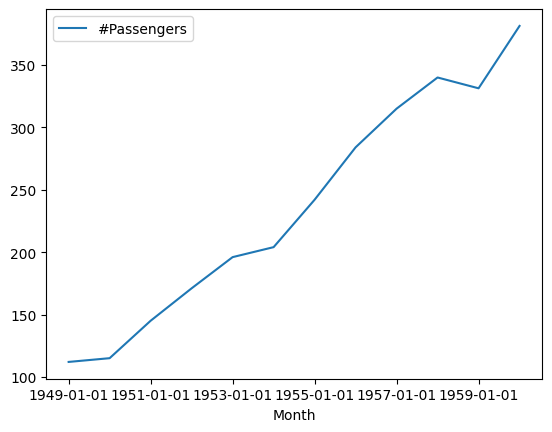

In [53]:

df[df['months']==1].plot(x = 'Month', y = "#Passengers")
plt.show()

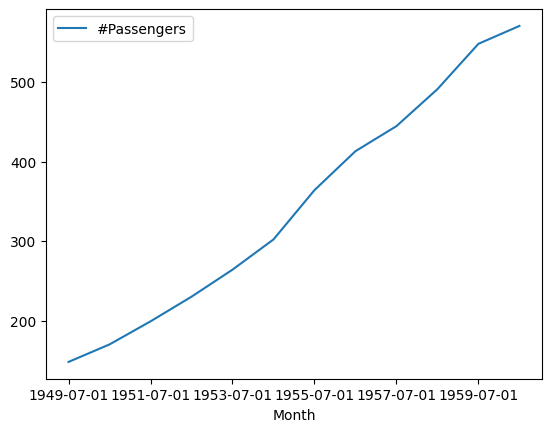

In [54]:

df[df['months']==7].plot(x = 'Month', y = "#Passengers")
plt.show()

Как мы видим, в Июле и в Январе число пассажиров имеет линейный ежегодный рост.

In [55]:
df['years'] = pd.DatetimeIndex( df['date']).year
df['years']

0      1949
1      1949
2      1949
3      1949
4      1949
       ... 
139    1960
140    1960
141    1960
142    1960
143    1960
Name: years, Length: 144, dtype: int64

In [56]:
df

,Month,#Passengers,date,months,years
0,1949-01-01,112.0,1949-01-01,1,1949
1,1949-02-01,118.0,1949-02-01,2,1949
2,1949-03-01,132.0,1949-03-01,3,1949
3,1949-04-01,126.5,1949-04-01,4,1949
4,1949-05-01,121.0,1949-05-01,5,1949
...,...,...,...,...,...
139,1960-08-01,606.0,1960-08-01,8,1960
140,1960-09-01,508.0,1960-09-01,9,1960
141,1960-10-01,461.0,1960-10-01,10,1960
142,1960-11-01,390.0,1960-11-01,11,1960


In [57]:
from statistics import variance
for i in df['years'].unique():
    print(f"Среднее за {i} год:",round(df[df['years']==i]['#Passengers'].mean(),3))
    print(f"Дисперсия за {i} год:",round(variance(df[df['years']==i]['#Passengers']),3))
    print("\n")

Среднее за 1949 год: 126.042
Дисперсия за 1949 год: 166.021


Среднее за 1950 год: 138.417
Дисперсия за 1950 год: 348.947


Среднее за 1951 год: 167.625
Дисперсия за 1951 год: 354.824


Среднее за 1952 год: 198.375
Дисперсия за 1952 год: 508.142


Среднее за 1953 год: 225.708
Дисперсия за 1953 год: 615.384


Среднее за 1954 год: 239.875
Дисперсия за 1954 год: 1227.278


Среднее за 1955 год: 284.0
Дисперсия за 1955 год: 1775.818


Среднее за 1956 год: 325.417
Дисперсия за 1956 год: 2096.992


Среднее за 1957 год: 367.208
Дисперсия за 1957 год: 2854.066


Среднее за 1958 год: 380.681
Дисперсия за 1958 год: 4259.467


Среднее за 1959 год: 423.167
Дисперсия за 1959 год: 5520.414


Среднее за 1960 год: 467.611
Дисперсия за 1960 год: 5402.709




Построим графику абсолютной разницы между соседними месяцами.

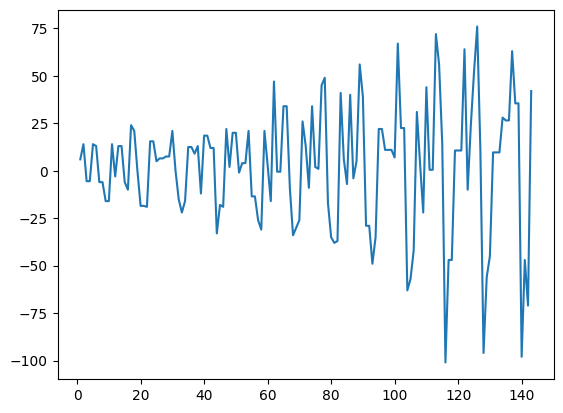

In [58]:
razn=[]
for i in range(1,len(df)):
    razn.append(df['#Passengers'][i]-df['#Passengers'][i-1])
plt.plot(range(1,144),razn)
plt.show()

По графику видно, что чем сильнее рост, тем сильнее падение. Наблюдается повышение дисперсии с ростом времени.

Построим графику абсолютной процентной между соседними месяцами.

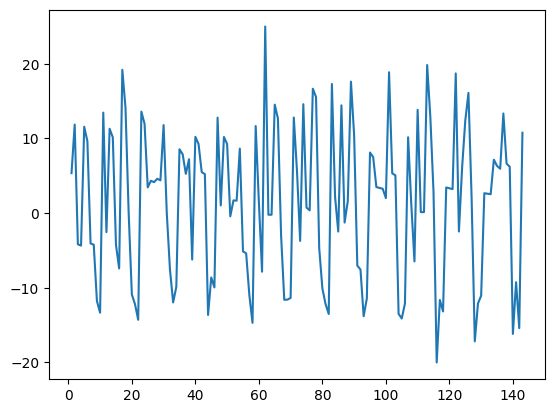

In [59]:
razn_precent=[]
for i in range(1,len(df)):
    razn_precent.append((df['#Passengers'][i]/df['#Passengers'][i-1]-1)*100)
plt.plot(range(1,144),razn_precent)
plt.show()

Как мы видим, в процентном соотношении рост не такой заметный как в абсолютном. Границы изменения составляют от падения на 20 процентов до роста на 20 процентов

In [60]:
df_copy = df.copy()
df_copy = df_copy.drop(columns=['Month','years','months'])


In [61]:
df_copy['date']=pd.to_datetime(df_copy['date'])
df_copy = df_copy.set_index('date')

In [62]:
df_copy

,#Passengers
date,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,126.5
1949-05-01,121.0
...,...
1960-08-01,606.0
1960-09-01,508.0
1960-10-01,461.0


# Понижение частоты дискретизации

До года

In [63]:
df_copy['#Passengers'].resample('Y').sum()

date
1949-12-31    1512.500000
1950-12-31    1661.000000
1951-12-31    2011.500000
1952-12-31    2380.500000
1953-12-31    2708.500000
1954-12-31    2878.500000
1955-12-31    3408.000000
1956-12-31    3905.000000
1957-12-31    4406.500000
1958-12-31    4568.166667
1959-12-31    5078.000000
1960-12-31    5611.333333
Freq: A-DEC, Name: #Passengers, dtype: float64

До квартала

In [64]:
df_copy['#Passengers'].resample('Q').sum()

date
1949-03-31     362.000000
1949-06-30     382.500000
1949-09-30     426.000000
1949-12-31     342.000000
1950-03-31     384.000000
1950-06-30     409.000000
1950-09-30     491.500000
1950-12-31     376.500000
1951-03-31     451.500000
1951-06-30     511.500000
1951-09-30     582.000000
1951-12-31     466.500000
1952-03-31     544.000000
1952-06-30     598.500000
1952-09-30     681.000000
1952-12-31     557.000000
1953-03-31     648.000000
1953-06-30     717.000000
1953-09-30     751.500000
1953-12-31     592.000000
1954-03-31     627.000000
1954-06-30     736.500000
1954-09-30     854.000000
1954-12-31     661.000000
1955-03-31     742.000000
1955-06-30     854.000000
1955-09-30    1023.000000
1955-12-31     789.000000
1956-03-31     878.000000
1956-06-30    1005.000000
1956-09-30    1152.000000
1956-12-31     870.000000
1957-03-31     978.000000
1957-06-30    1125.000000
1957-09-30    1315.500000
1957-12-31     988.000000
1958-03-31    1020.000000
1958-06-30    1160.500000
1958-09

# Повышение частоты дискретизации

Заполнение последующим значением предыдущих.(до дня)

In [65]:
df_copy['#Passengers'].resample('D').bfill()

date
1949-01-01    112.0
1949-01-02    118.0
1949-01-03    118.0
1949-01-04    118.0
1949-01-05    118.0
              ...  
1960-11-27    432.0
1960-11-28    432.0
1960-11-29    432.0
1960-11-30    432.0
1960-12-01    432.0
Freq: D, Name: #Passengers, Length: 4353, dtype: float64

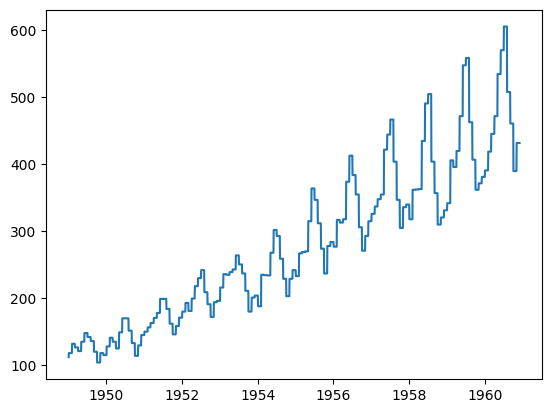

In [66]:
p = plt.plot(df_copy['#Passengers'].resample('D').bfill().index, df_copy['#Passengers'].resample('D').bfill().values)

Заполнение прыдыдущих значений следующим.(до дня)

In [67]:
df_copy['#Passengers'].resample('D').ffill()

date
1949-01-01    112.0
1949-01-02    112.0
1949-01-03    112.0
1949-01-04    112.0
1949-01-05    112.0
              ...  
1960-11-27    390.0
1960-11-28    390.0
1960-11-29    390.0
1960-11-30    390.0
1960-12-01    432.0
Freq: D, Name: #Passengers, Length: 4353, dtype: float64

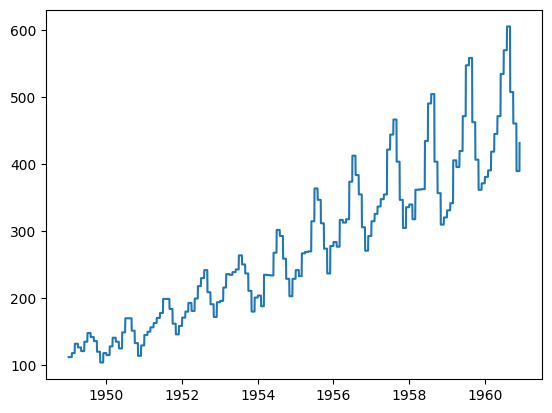

In [68]:
p = plt.plot(df_copy['#Passengers'].resample('D').ffill().index, df_copy['#Passengers'].resample('D').ffill().values)

Заполнение последующим значением предыдущих.(до недели)

In [69]:
df_copy['#Passengers'].resample('W').bfill()

date
1949-01-02    118.0
1949-01-09    118.0
1949-01-16    118.0
1949-01-23    118.0
1949-01-30    118.0
              ...  
1960-11-06    432.0
1960-11-13    432.0
1960-11-20    432.0
1960-11-27    432.0
1960-12-04      NaN
Freq: W-SUN, Name: #Passengers, Length: 623, dtype: float64

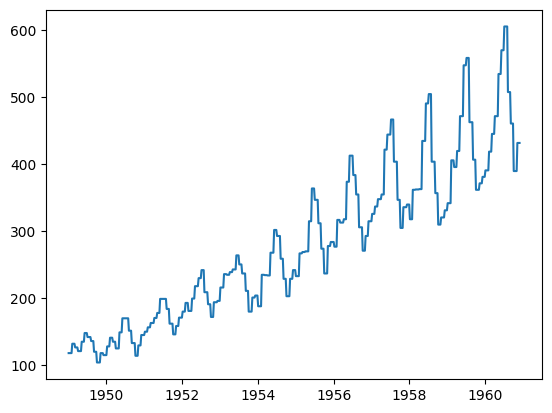

In [70]:
p = plt.plot(df_copy['#Passengers'].resample('W').bfill().index, df_copy['#Passengers'].resample('W').bfill().values)

Заполнение прыдыдущих значений следующим.(до недели)

In [71]:
df_copy['#Passengers'].resample('W').ffill()

date
1949-01-02    112.0
1949-01-09    112.0
1949-01-16    112.0
1949-01-23    112.0
1949-01-30    112.0
              ...  
1960-11-06    390.0
1960-11-13    390.0
1960-11-20    390.0
1960-11-27    390.0
1960-12-04    432.0
Freq: W-SUN, Name: #Passengers, Length: 623, dtype: float64

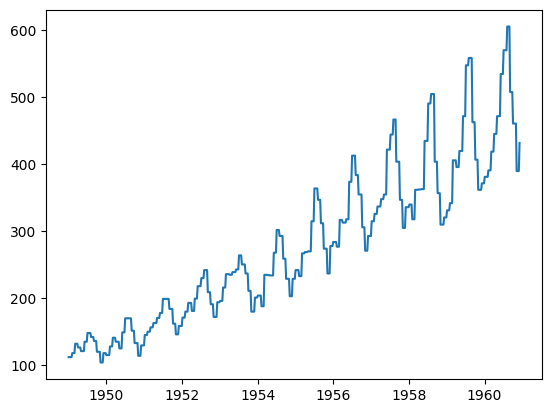

In [72]:
p = plt.plot(df_copy['#Passengers'].resample('W').ffill().index, df_copy['#Passengers'].resample('W').ffill().values)

In [73]:
df_copy1 = pd.DataFrame(df_copy['#Passengers'].resample('D').mean())
df_copy1['date'] = df_copy1.index
df_copy1 = df_copy1.reset_index(drop=True)

In [74]:
df_copy1

,#Passengers,date
0,112.0,1949-01-01
1,NaN,1949-01-02
2,NaN,1949-01-03
3,NaN,1949-01-04
4,NaN,1949-01-05
...,...,...
4348,NaN,1960-11-27
4349,NaN,1960-11-28
4350,NaN,1960-11-29
4351,NaN,1960-11-30


Замена пропущенных значений среднегодовым

In [75]:
df_copy1["task"] = df_copy1.groupby(df_copy1["date"].dt.year)["#Passengers"].transform(lambda x: x.fillna(x.mean()))

In [76]:
df_copy1

,#Passengers,date,task
0,112.0,1949-01-01,112.000000
1,NaN,1949-01-02,126.041667
2,NaN,1949-01-03,126.041667
3,NaN,1949-01-04,126.041667
4,NaN,1949-01-05,126.041667
...,...,...,...
4348,NaN,1960-11-27,467.611111
4349,NaN,1960-11-28,467.611111
4350,NaN,1960-11-29,467.611111
4351,NaN,1960-11-30,467.611111


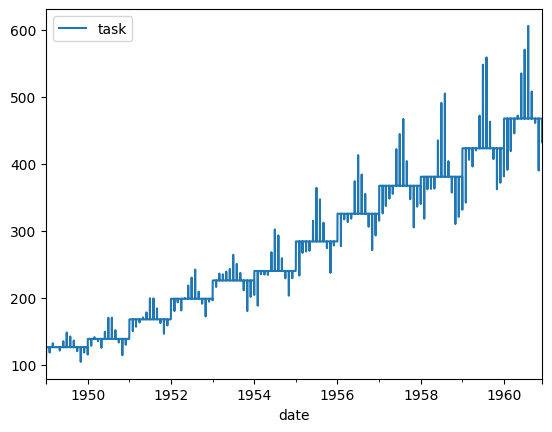

In [77]:
df_copy1.plot(x = "date", y = "task")
plt.show()

Замена пропущенных значений среднемесячным

In [78]:
df_copy1["avg_month"] = df_copy1.groupby(df_copy1["date"].dt.month)["#Passengers"].transform(lambda x: x.fillna(x.mean()))

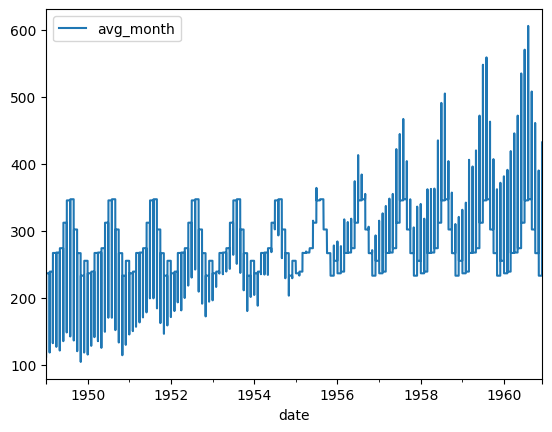

In [79]:
df_copy1.plot(x = "date", y = "avg_month")
plt.show()

In [80]:
df_copy1["sum_month"] = df_copy1.groupby(df_copy1["date"].dt.month)["#Passengers"].transform(lambda x: x.fillna(x.sum()))

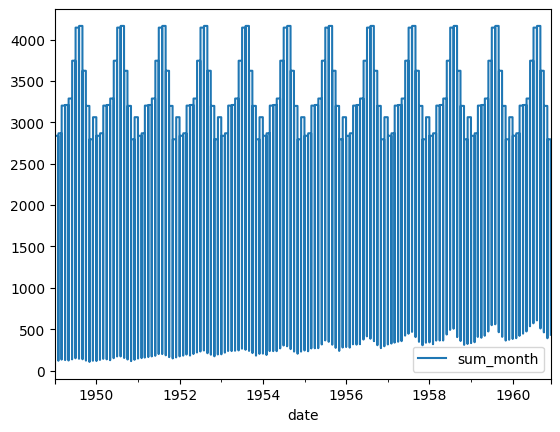

In [81]:
df_copy1.plot(x = "date", y = "sum_month")
plt.show()

Лучшим образом себя показала замена среднегодовыми значениями.